In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import linear_model
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format
sns.set()

# Suppress annoying harmless error.
import warnings
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

In [2]:
df = pd.read_excel('nyc_crimes.xls', skiprows=4)

In [3]:
df.head(15)

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3
0,Adams Village,1861.000,0.000,0.000,nan,0.000,0.000,0.000,12.000,2.000,10.000,0.000,0.000
1,Addison Town and Village,2577.000,3.000,0.000,nan,0.000,0.000,3.000,24.000,3.000,20.000,1.000,0.000
2,Akron Village,2846.000,3.000,0.000,nan,0.000,0.000,3.000,16.000,1.000,15.000,0.000,0.000
3,Albany,97956.000,791.000,8.000,nan,30.000,227.000,526.000,4090.000,705.000,3243.000,142.000,nan
4,Albion Village,6388.000,23.000,0.000,nan,3.000,4.000,16.000,223.000,53.000,165.000,5.000,nan
5,Alfred Village,4089.000,5.000,0.000,nan,0.000,3.000,2.000,46.000,10.000,36.000,0.000,nan
6,Allegany Village,1781.000,3.000,0.000,nan,0.000,0.000,3.000,10.000,0.000,10.000,0.000,0.000
7,Amherst Town,118296.000,107.000,1.000,nan,7.000,31.000,68.000,2118.000,204.000,1882.000,32.000,3.000
8,Amityville Village,9519.000,9.000,0.000,nan,2.000,4.000,3.000,210.000,16.000,188.000,6.000,1.000
9,Amsterdam,18182.000,30.000,0.000,nan,0.000,12.000,18.000,405.000,99.000,291.000,15.000,0.000


In [4]:
df.tail()

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3
346,Yonkers,199134.000,1036.000,6.000,nan,25.000,390.000,615.000,2368.000,470.000,1662.000,236.000,10.000
347,Yorktown Town,36643.000,15.000,0.000,nan,0.000,2.000,13.000,334.000,45.000,287.000,2.000,nan
348,1 The figures shown in this column for the off...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
349,2 The figures shown in this column for the off...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
350,3 The FBI does not publish arson data unless i...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


In [5]:
df = df.drop([348, 349, 350])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 348 entries, 0 to 347
Data columns (total 13 columns):
City                                    348 non-null object
Population                              348 non-null float64
Violent
crime                           348 non-null float64
Murder and
nonnegligent
manslaughter    348 non-null float64
Rape
(revised
definition)1              0 non-null float64
Rape
(legacy
definition)2               348 non-null float64
Robbery                                 348 non-null float64
Aggravated
assault                      348 non-null float64
Property
crime                          348 non-null float64
Burglary                                348 non-null float64
Larceny-
theft                          348 non-null float64
Motor
vehicle
theft                     348 non-null float64
Arson3                                  187 non-null float64
dtypes: float64(12), object(1)
memory usage: 38.1+ KB


In [7]:
df.describe()

,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3
count,348.000,348.000,348.000,0.000,348.000,348.000,348.000,348.000,348.000,348.000,348.000,187.000
mean,40037.632,201.595,1.566,nan,5.865,72.902,121.261,792.606,119.684,637.017,35.905,1.872
std,450037.368,2815.269,18.304,nan,60.425,1031.033,1706.132,7659.725,924.949,6346.054,403.424,10.693
min,526.000,0.000,0.000,nan,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,3003.000,2.000,0.000,nan,0.000,0.000,1.000,40.500,6.000,31.000,0.000,0.000
50%,7233.500,6.000,0.000,nan,0.000,1.000,4.000,112.500,17.500,94.000,2.000,0.000
75%,18427.500,22.000,0.000,nan,2.000,5.000,14.000,341.000,51.250,287.250,7.000,1.000
max,8396126.000,52384.000,335.000,nan,1112.000,19170.000,31767.000,141971.000,16606.000,117931.000,7434.000,132.000


In [8]:
# Create feature set including target variable
features = pd.DataFrame()
features['property_crime'] = df['Property\ncrime']
features['population'] = df['Population']
features['pop_square'] = df['Population'] ** 2
features['murder'] = np.where(df['Murder and\nnonnegligent\nmanslaughter'] > 0, 1, 0)
features['robbery'] = np.where(df['Robbery'] > 0, 1, 0)

features.head()

,property_crime,population,pop_square,murder,robbery
0,12.000,1861.000,3463321.000,0,0
1,24.000,2577.000,6640929.000,0,0
2,16.000,2846.000,8099716.000,0,0
3,4090.000,97956.000,9595377936.000,1,1
4,223.000,6388.000,40806544.000,0,1


In [9]:
features.describe()

,property_crime,population,pop_square,murder,robbery
count,348.000,348.000,348.000,348.000,348.000
mean,792.606,40037.632,203554650960.236,0.141,0.601
std,7659.725,450037.368,3778875542708.129,0.348,0.490
min,0.000,526.000,276676.000,0.000,0.000
25%,40.500,3003.000,9018117.000,0.000,0.000
50%,112.500,7233.500,52325684.500,0.000,1.000
75%,341.000,18427.500,339753567.000,0.000,1.000
max,141971.000,8396126.000,70494931807876.000,1.000,1.000


In [10]:
features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 348 entries, 0 to 347
Data columns (total 5 columns):
property_crime    348 non-null float64
population        348 non-null float64
pop_square        348 non-null float64
murder            348 non-null int64
robbery           348 non-null int64
dtypes: float64(3), int64(2)
memory usage: 16.3 KB


                property_crime  population  pop_square  murder  robbery
property_crime           1.000       0.996       0.991   0.191    0.079
population               0.996       1.000       0.998   0.162    0.064
pop_square               0.991       0.998       1.000   0.133    0.044
murder                   0.191       0.162       0.133   1.000    0.313
robbery                  0.079       0.064       0.044   0.313    1.000


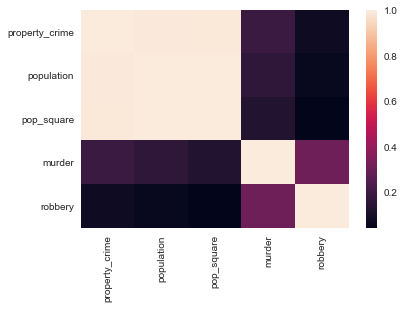

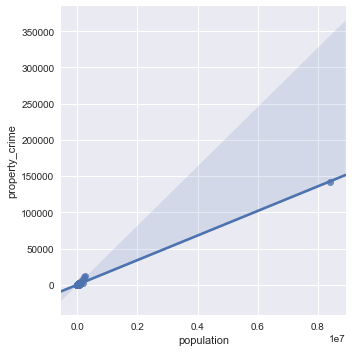

In [11]:
corrmat = features.corr()
print(corrmat)

sns.heatmap(corrmat)

sns.lmplot(
    x='population',
    y='property_crime', 
    data=features,
    scatter=True
)

plt.show()

In [12]:
# missing data
total = features.isnull().sum().sort_values(ascending=False)
percent = (features.isnull().sum()/features.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
robbery,0,0.000
murder,0,0.000
pop_square,0,0.000
population,0,0.000
property_crime,0,0.000


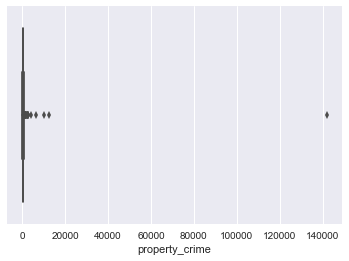

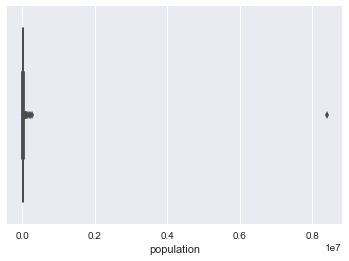

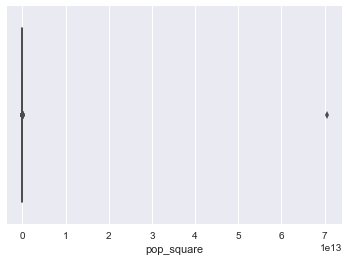

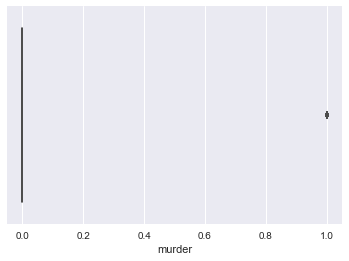

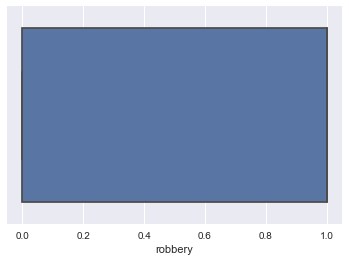

In [13]:
for col in features.columns:
    sns.boxplot(x=features[col])
    plt.show()

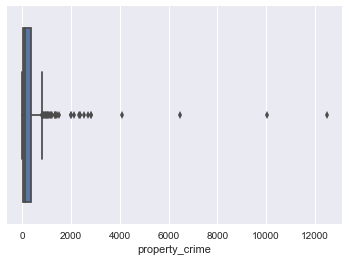

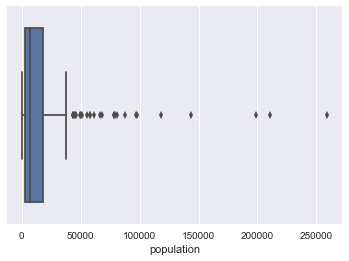

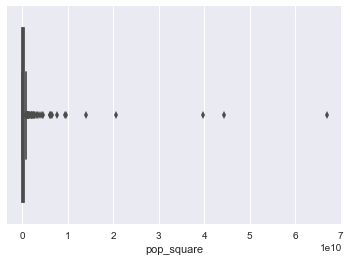

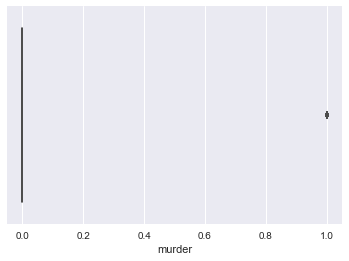

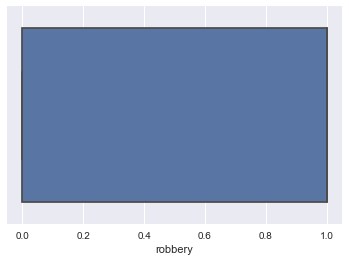

In [14]:
# Remove outliers
from scipy import stats

features = features[(np.abs(stats.zscore(features)) < 3).all(axis=1)]

for col in features.columns:
    sns.boxplot(x=features[col])
    plt.show()

In [15]:
# Instantiate our model.
regr = linear_model.LinearRegression()

x = features[['population', 'pop_square', 'murder', 'robbery']]
y = features['property_crime']
# Fit our model to our data.
regr.fit(x, y)

# Inspect the results
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared: ')
print(regr.score(x, y))


Coefficients: 
 [1.29510871e-02 1.14920528e-07 1.95038666e+02 9.28205845e+01]

Intercept: 
 -16.815866321663293

R-squared: 
0.8444937611173492


### Improving the Regression Model

After using the provided multivariable regression functional form, let's attempt to add some useful features and fix any issues with the data to improve our R-squared. 

In [16]:
df.head()

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3
0,Adams Village,1861.000,0.000,0.000,nan,0.000,0.000,0.000,12.000,2.000,10.000,0.000,0.000
1,Addison Town and Village,2577.000,3.000,0.000,nan,0.000,0.000,3.000,24.000,3.000,20.000,1.000,0.000
2,Akron Village,2846.000,3.000,0.000,nan,0.000,0.000,3.000,16.000,1.000,15.000,0.000,0.000
3,Albany,97956.000,791.000,8.000,nan,30.000,227.000,526.000,4090.000,705.000,3243.000,142.000,nan
4,Albion Village,6388.000,23.000,0.000,nan,3.000,4.000,16.000,223.000,53.000,165.000,5.000,nan


In [17]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Population,348.000,40037.632,450037.368,526.000,3003.000,7233.500,18427.500,8396126.000
Violent\ncrime,348.000,201.595,2815.269,0.000,2.000,6.000,22.000,52384.000
Murder and\nnonnegligent\nmanslaughter,348.000,1.566,18.304,0.000,0.000,0.000,0.000,335.000
Rape\n(revised\ndefinition)1,0.000,nan,nan,nan,nan,nan,nan,nan
Rape\n(legacy\ndefinition)2,348.000,5.865,60.425,0.000,0.000,0.000,2.000,1112.000
Robbery,348.000,72.902,1031.033,0.000,0.000,1.000,5.000,19170.000
Aggravated\nassault,348.000,121.261,1706.132,0.000,1.000,4.000,14.000,31767.000
Property\ncrime,348.000,792.606,7659.725,0.000,40.500,112.500,341.000,141971.000
Burglary,348.000,119.684,924.949,0.000,6.000,17.500,51.250,16606.000
Larceny-\ntheft,348.000,637.017,6346.054,0.000,31.000,94.000,287.250,117931.000


In [18]:
features.head()

,property_crime,population,pop_square,murder,robbery
0,12.000,1861.000,3463321.000,0,0
1,24.000,2577.000,6640929.000,0,0
2,16.000,2846.000,8099716.000,0,0
3,4090.000,97956.000,9595377936.000,1,1
4,223.000,6388.000,40806544.000,0,1


### First Additional Feature

The first feature I would like to include in order to better predict property crime will be to include Larceny-theft in our feature set.

In [19]:
# Adding 'theft' feature
features['theft'] = df['Larceny-\ntheft']

### Second New Feature

I also want to include Burglary in this updated regression which I would consider a strong indicator for property crime.

In [20]:
# Adding 'burglary' feature
features['burglary'] = df['Burglary']

In [21]:
features.head()

,property_crime,population,pop_square,murder,robbery,theft,burglary
0,12.000,1861.000,3463321.000,0,0,10.000,2.000
1,24.000,2577.000,6640929.000,0,0,20.000,3.000
2,16.000,2846.000,8099716.000,0,0,15.000,1.000
3,4090.000,97956.000,9595377936.000,1,1,3243.000,705.000
4,223.000,6388.000,40806544.000,0,1,165.000,53.000


In [22]:
features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 347 entries, 0 to 347
Data columns (total 7 columns):
property_crime    347 non-null float64
population        347 non-null float64
pop_square        347 non-null float64
murder            347 non-null int64
robbery           347 non-null int64
theft             347 non-null float64
burglary          347 non-null float64
dtypes: float64(5), int64(2)
memory usage: 31.7 KB


                property_crime  population  pop_square  murder  robbery  \
property_crime           1.000       0.887       0.893   0.443    0.267   
population               0.887       1.000       0.889   0.503    0.344   
pop_square               0.893       0.889       1.000   0.345    0.152   
murder                   0.443       0.503       0.345   1.000    0.311   
robbery                  0.267       0.344       0.152   0.311    1.000   
theft                    0.995       0.901       0.873   0.458    0.297   
burglary                 0.977       0.820       0.893   0.402    0.197   

                theft  burglary  
property_crime  0.995     0.977  
population      0.901     0.820  
pop_square      0.873     0.893  
murder          0.458     0.402  
robbery         0.297     0.197  
theft           1.000     0.950  
burglary        0.950     1.000  


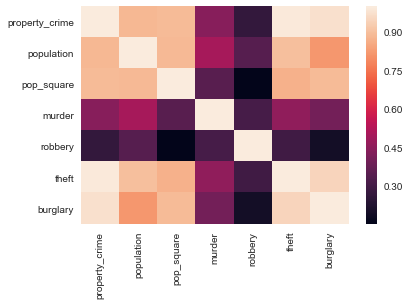

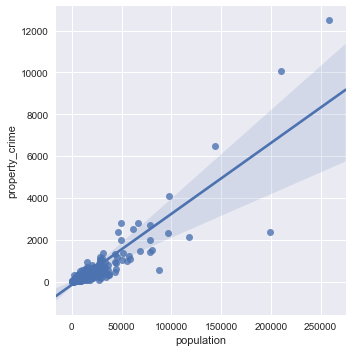

In [23]:
# Checking our correlations to target variable
corrmat2 = features.corr()
print(corrmat2)

# Making heatmap of correlations
sns.heatmap(corrmat2)

# Making scatter plot showing linear relationship to target
sns.lmplot(
    x='population',
    y='property_crime', 
    data=features,
    scatter=True
)

plt.show()

In [24]:
# Instantiate our model.
regr = linear_model.LinearRegression()

x = features[['population', 'pop_square', 'murder', 'robbery', 'theft', 'burglary']]
y = features['property_crime']
# Fit our model to our data.
regr.fit(x, y)

# Inspect the results
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared: ')
print(regr.score(x, y))


Coefficients: 
 [-8.41820276e-05  5.00580263e-09 -4.62590057e-01  7.57826522e-01
  9.84180771e-01  1.21149814e+00]

Intercept: 
 0.06850894293626197

R-squared: 
0.9999099426310988


Very high R-squared, indicating overfitting. Let's remove ouliers once more from our features in hopes of getting a more realistic R-squared.

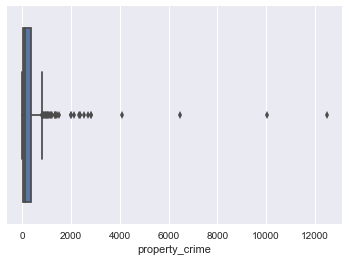

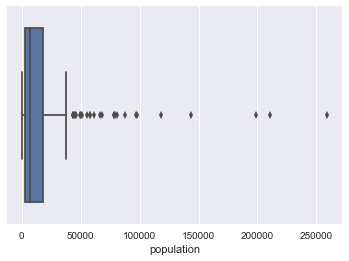

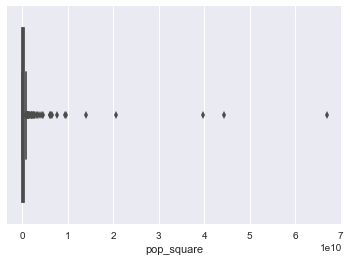

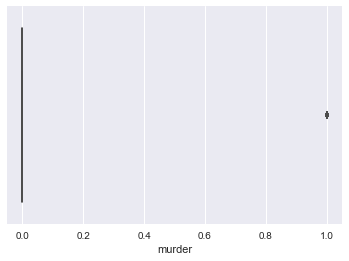

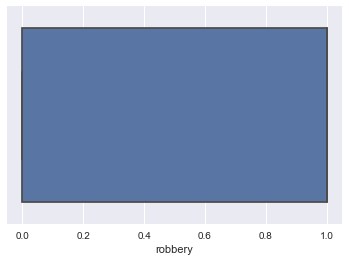

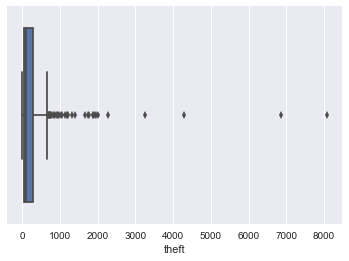

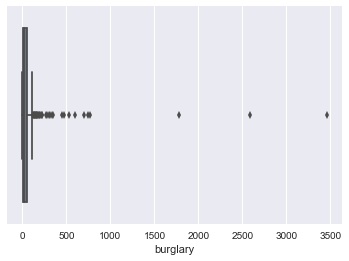

In [25]:

for col in features.columns:
    sns.boxplot(x=features[col])
    plt.show()

In [26]:
# Removing outliers
features = features[(np.abs(stats.zscore(features)) < 3).all(axis=1)]

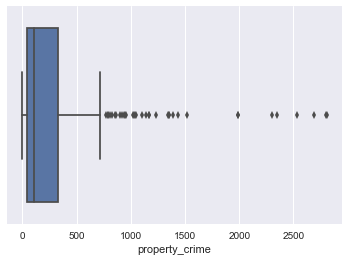

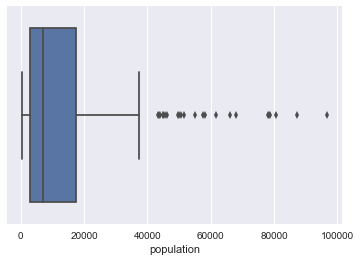

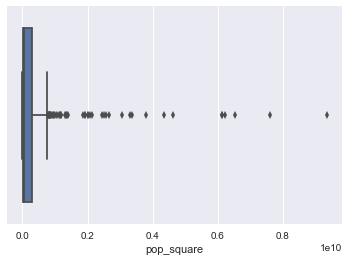

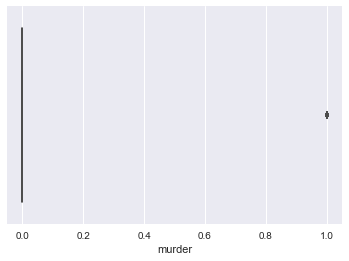

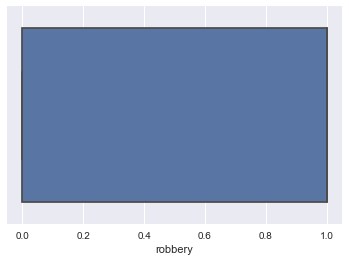

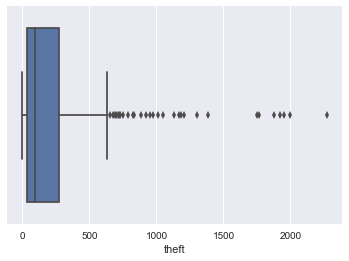

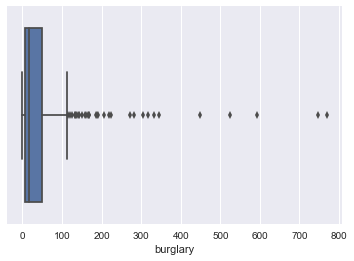

In [27]:

for col in features.columns:
    sns.boxplot(x=features[col])
    plt.show()

In [28]:
# Instantiate our model.
regr = linear_model.LinearRegression()

x = features[['population', 'pop_square', 'murder', 'robbery', 'theft', 'burglary']]
y = features['property_crime']
# Fit our model to our data.
regr.fit(x, y)

# Inspect the results
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared: ')
print(regr.score(x, y))


Coefficients: 
 [ 1.77865367e-04  3.26873264e-09  1.66460009e+00 -6.60707169e-01
  9.88786409e-01  1.16695913e+00]

Intercept: 
 -0.8801121076725735

R-squared: 
0.9996201230765853
